In [1]:
#Statistical Analysis of Marketing campaign (Customer data set)

In [2]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
#setting the precision to 2 (instead of default 6)
pd.set_option('display.precision',2)
pd.options.display.float_format = '{:.2f}'.format

In [28]:
#reading the file
df = pd.read_csv('dataset_marketing.csv')

In [29]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.00,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.00,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.00,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.00,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [30]:
#exploring data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [31]:
#filling the data with 0 (when NaN values are found)
df.Income = df.Income.fillna(0)

In [32]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.00,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.00,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.00,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.00,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [33]:
#checking the types of education
df['Education'].value_counts().to_frame()

,Education
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [34]:
#checking the marital status
df['Marital_Status'].value_counts().to_frame()

,Marital_Status
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [36]:
#preparing the data
#change the type of education and marital status to category
#change the format of customer registration to date format
df[['Education','Marital_Status']] = df[['Education','Marital_Status']].astype('category')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df[['Education','Marital_Status', 'Dt_Customer']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Education       2240 non-null   category      
 1   Marital_Status  2240 non-null   category      
 2   Dt_Customer     2240 non-null   datetime64[ns]
dtypes: category(2), datetime64[ns](1)
memory usage: 22.6 KB


In [37]:
#Statistical Analysis

In [38]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,...,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,5592.16,1968.81,51687.46,0.44,0.51,49.11,303.94,26.30,166.95,37.53,...,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.00,11.00,0.15
std,3246.66,11.98,25609.34,0.54,0.54,28.96,336.60,39.77,225.72,54.63,...,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.00,0.00,0.36
min,0.00,1893.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
25%,2828.25,1959.00,34722.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,...,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
50%,5458.50,1970.00,51075.00,0.00,0.00,49.00,173.50,8.00,67.00,12.00,...,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
75%,8427.75,1977.00,68289.75,1.00,1.00,74.00,504.25,33.00,232.00,50.00,...,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,...,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,11.00,1.00


In [39]:
df.describe(include='category')

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


In [40]:
#determining percentage of customers by type of education
pd.options.display.float_format = '{:.1f}%'.format
edu = df['Education'].value_counts(normalize=True)*100
edu

Graduation   50.3%
PhD          21.7%
Master       16.5%
2n Cycle      9.1%
Basic         2.4%
Name: Education, dtype: float64

In [41]:
#obtaining distribution of customers acc to marital status and education
pd.crosstab(df['Education'],
            df['Marital_Status'], normalize=True
            )*100

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,0.0%,0.0%,1.0%,3.6%,1.7%,2.5%,0.2%,0.0%
Basic,0.0%,0.0%,0.0%,0.9%,0.8%,0.6%,0.0%,0.0%
Graduation,0.0%,0.0%,5.3%,19.3%,11.2%,12.8%,1.6%,0.0%
Master,0.0%,0.0%,1.7%,6.2%,3.3%,4.7%,0.5%,0.0%
PhD,0.0%,0.0%,2.3%,8.6%,4.4%,5.2%,1.1%,0.1%


<AxesSubplot:xlabel='Marital_Status', ylabel='Education'>

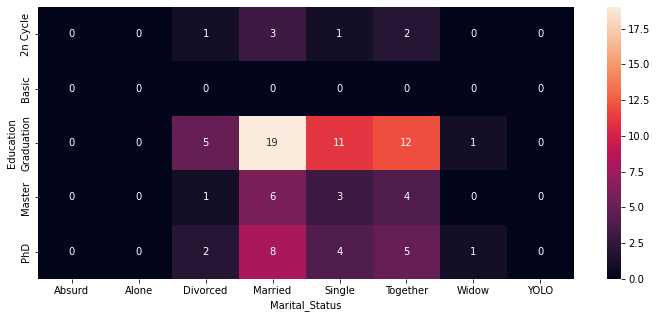

In [42]:
#Visualization through heatmap
plt.figure(figsize=(12,5))
sns.heatmap((pd.crosstab(df['Education'],
            df['Marital_Status'], normalize=True
            )*100).astype('int'), annot=True, fmt="d")

In [44]:
#Analysing the impact of first campaign (based on education)
pd.crosstab(df['Education'],
            df['AcceptedCmp1'], normalize=True, margins=True, margins_name="Total"
            )*100

AcceptedCmp1,0,1,Total
Education,,,
2n Cycle,8.4%,0.6%,9.1%
Basic,2.4%,0.0%,2.4%
Graduation,46.7%,3.7%,50.3%
Master,15.7%,0.8%,16.5%
PhD,20.4%,1.3%,21.7%
Total,93.6%,6.4%,100.0%


In [45]:
#Analysing the impact of first campaign (based on marital status)
pd.crosstab(df['Marital_Status'],
            df['AcceptedCmp1'], normalize=True, margins=True, margins_name="Total"
            )*100

AcceptedCmp1,0,1,Total
Marital_Status,,,
Absurd,0.0%,0.0%,0.1%
Alone,0.1%,0.0%,0.1%
Divorced,9.8%,0.5%,10.4%
Married,35.8%,2.8%,38.6%
Single,20.0%,1.4%,21.4%
Together,24.5%,1.4%,25.9%
Widow,3.2%,0.2%,3.4%
YOLO,0.1%,0.0%,0.1%
Total,93.6%,6.4%,100.0%


In [49]:
#investigating the sales impact
pd.options.display.float_format = '{:.2f}'.format
df.pivot_table(index= "Education", columns = 'Marital_Status', values = 'AcceptedCmp1', aggfunc = "sum")

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,0,0,1,8,3,1,1,0
Basic,0,0,0,0,0,0,0,0
Graduation,1,0,9,33,13,24,2,0
Master,0,0,1,9,4,2,2,0
PhD,0,0,1,13,11,5,0,0


In [52]:
#creating a new data set where people responded to first campaign
dfa1 = df[df['AcceptedCmp1']>0]
dfa1['AcceptedCmp'] = 1

In [54]:
#same procedure for other campaigns
dfa2 = df[df['AcceptedCmp2']>0]
dfa2['AcceptedCmp'] = 2
dfa3 = df[df['AcceptedCmp3']>0]
dfa3['AcceptedCmp'] = 3
dfa4 = df[df['AcceptedCmp4']>0]
dfa4['AcceptedCmp'] = 4
dfa5 = df[df['AcceptedCmp5']>0]
dfa5['AcceptedCmp'] = 5

In [57]:
#combining data sets
dfa = dfa1.append(dfa2)
dfa = dfa.append(dfa3)
dfa = dfa.append(dfa4)
dfa = dfa.append(dfa5)
dfa

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AcceptedCmp
15,2114,1946,PhD,Single,82800.00,0,0,2012-11-24,23,1006,...,0,0,1,1,0,0,3,11,1,1
18,6565,1949,Master,Married,76995.00,0,1,2013-03-28,91,1012,...,0,0,0,1,0,0,3,11,0,1
53,2225,1977,Graduation,Divorced,82582.00,0,0,2014-06-07,54,510,...,1,0,0,1,0,0,3,11,1,1
67,9369,1979,2n Cycle,Single,88194.00,0,1,2014-03-19,19,688,...,1,0,0,1,0,0,3,11,1,1
87,4452,1957,Graduation,Single,50388.00,0,1,2014-05-28,3,292,...,0,1,0,1,0,0,3,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,10394,1984,Graduation,Married,90000.00,0,0,2013-12-23,91,675,...,1,0,1,1,0,0,3,11,0,5
2171,3968,1970,2n Cycle,Divorced,65706.00,0,0,2013-06-28,77,918,...,0,1,1,0,1,0,3,11,1,5
2175,1772,1975,PhD,Married,79174.00,0,0,2013-01-11,2,1074,...,0,0,1,1,0,0,3,11,1,5
2187,5721,1956,PhD,Married,84117.00,0,0,2014-05-11,60,611,...,0,0,1,0,0,0,3,11,0,5


In [58]:
#pivot and analyse the combined dataset
df_p = pd.pivot_table(dfa, values='ID', index=['AcceptedCmp','Education'],
               columns=['Marital_Status'], aggfunc="count", fill_value=0, margins=True, margins_name="Total")
df_p

Marital_Status          Absurd  Alone  Divorced  Married  Single  Together  \
AcceptedCmp Education                                                        
1           2n Cycle         0      0         1        8       3         1   
            Basic            0      0         0        0       0         0   
            Graduation       1      0         9       33      13        24   
            Master           0      0         1        9       4         2   
            PhD              0      0         1       13      11         5   
2           2n Cycle         0      0         2        0       0         0   
            Basic            0      0         0        0       0         0   
            Graduation       0      0         2        4       3         7   
            Master           0      0         0        0       1         1   
            PhD              0      0         1        3       1         4   
3           2n Cycle         0      0         0        8       4         3   
            Basic            0      0         0        2       0         4   
            Graduation       0      0        12       28      23        12   
            Master           0      0         0       13       5         6   
            PhD              0      1         8       12       6        12   
4           2n Cycle         0      0         3        1       2         4   
            Basic            0      0         0        0       0         0   
            Graduation       0      0         8       30      17        22   
            Master           0      0         2       11       8         7   
            PhD              0      0         5       21       6        10   
5           2n Cycle         0      0         3        4       1         2   
            Basic            0      0         0        0       0         0   
            Graduation       1      0         8       31      15        29   
            Master           0      0         0       10       8         7   
            PhD              0      0         2       21       7         6   
Total                        2      1        68      262     138       168   

Marital_Status          Widow  YOLO  Total  
AcceptedCmp Education                       
1           2n Cycle        1     0  14.00  
            Basic           0     0    NaN  
            Graduation      2     0  82.00  
            Master          2     0  18.00  
            PhD             0     0  30.00  
2           2n Cycle        0     0   2.00  
            Basic           0     0    NaN  
            Graduation      0     0  16.00  
            Master          0     0   2.00  
            PhD             1     0  10.00  
3           2n Cycle        0     0  15.00  
            Basic           0     0   6.00  
            Graduation      3     0  78.00  
            Master          0     0  24.00  
            PhD             1     0  40.00  
4           2n Cycle        0     0  10.00  
            Basic           0     0    NaN  
            Graduation      4     0  81.00  
            Master          3     0  31.00  
            PhD             3     0  45.00  
5           2n Cycle        0     0  10.00  
            Basic           0     0    NaN  
            Graduation      2     0  86.00  
            Master          3     0  28.00  
            PhD             3     0  39.00  
Total                      28     0 667.00

In [59]:
#comparing the effectiveness
dfa['AcceptedCmp'].value_counts(normalize=True).sort_index()

1   0.22
2   0.04
3   0.24
4   0.25
5   0.24
Name: AcceptedCmp, dtype: float64

In [60]:
d = df_p.reset_index()
d = d[d.columns[:-1]]
d = d.set_index('Education')
d

Marital_Status,AcceptedCmp,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,,
2n Cycle,1,0,0,1,8,3,1,1,0
Basic,1,0,0,0,0,0,0,0,0
Graduation,1,1,0,9,33,13,24,2,0
Master,1,0,0,1,9,4,2,2,0
PhD,1,0,0,1,13,11,5,0,0
2n Cycle,2,0,0,2,0,0,0,0,0
Basic,2,0,0,0,0,0,0,0,0
Graduation,2,0,0,2,4,3,7,0,0
Master,2,0,0,0,0,1,1,0,0


In [61]:
#calculating difference between campaigns and group data
df_dif = pd.DataFrame()
for a in range(2,6):
    df_dif = df_dif.append(d[d['AcceptedCmp']==a]-d[d['AcceptedCmp']==1])
df_dif['AcceptedCmp'] = df_dif['AcceptedCmp'] + 1
df_dif.groupby(['AcceptedCmp', 'Education' ],).sum()

Marital_Status          Absurd  Alone  Divorced  Married  Single  Together  \
AcceptedCmp Education                                                        
2           2n Cycle         0      0         1       -8      -3        -1   
            Basic            0      0         0        0       0         0   
            Graduation      -1      0        -7      -29     -10       -17   
            Master           0      0        -1       -9      -3        -1   
            PhD              0      0         0      -10     -10        -1   
3           2n Cycle         0      0        -1        0       1         2   
            Basic            0      0         0        2       0         4   
            Graduation      -1      0         3       -5      10       -12   
            Master           0      0        -1        4       1         4   
            PhD              0      1         7       -1      -5         7   
4           2n Cycle         0      0         2       -7      -1         3   
            Basic            0      0         0        0       0         0   
            Graduation      -1      0        -1       -3       4        -2   
            Master           0      0         1        2       4         5   
            PhD              0      0         4        8      -5         5   
5           2n Cycle         0      0         2       -4      -2         1   
            Basic            0      0         0        0       0         0   
            Graduation       0      0        -1       -2       2         5   
            Master           0      0        -1        1       4         5   
            PhD              0      0         1        8      -4         1   

Marital_Status          Widow  YOLO  
AcceptedCmp Education                
2           2n Cycle       -1     0  
            Basic           0     0  
            Graduation     -2     0  
            Master         -2     0  
            PhD             1     0  
3           2n Cycle       -1     0  
            Basic           0     0  
            Graduation      1     0  
            Master         -2     0  
            PhD             1     0  
4           2n Cycle       -1     0  
            Basic           0     0  
            Graduation      2     0  
            Master          1     0  
            PhD             3     0  
5           2n Cycle       -1     0  
            Basic           0     0  
            Graduation      0     0  
            Master          1     0  
            PhD             3     0

In [62]:
#categorising according to age
now = pd.Timestamp('now').year
age = now-dfa.Year_Birth
age

15      77
18      74
53      46
67      44
87      66
        ..
2168    39
2171    53
2175    48
2187    67
2221    41
Name: Year_Birth, Length: 667, dtype: int64

In [63]:
#create field containing age group
bins = pd.IntervalIndex.from_tuples([(17, 30), (30, 40), (40, 50), (50, 60), (60, 100)])
dfa['Age'] = pd.cut(age, bins)
dfa['Age']

15      (60, 100]
18      (60, 100]
53       (40, 50]
67       (40, 50]
87      (60, 100]
          ...    
2168     (30, 40]
2171     (50, 60]
2175     (40, 50]
2187    (60, 100]
2221     (40, 50]
Name: Age, Length: 667, dtype: category
Categories (5, interval[int64, right]): [(17, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 100]]

In [64]:
#counting age groups
dfa['Age'].value_counts().to_frame()

,Age
"(60, 100]",229
"(40, 50]",164
"(50, 60]",160
"(30, 40]",103
"(17, 30]",10


In [65]:
#Data visualization

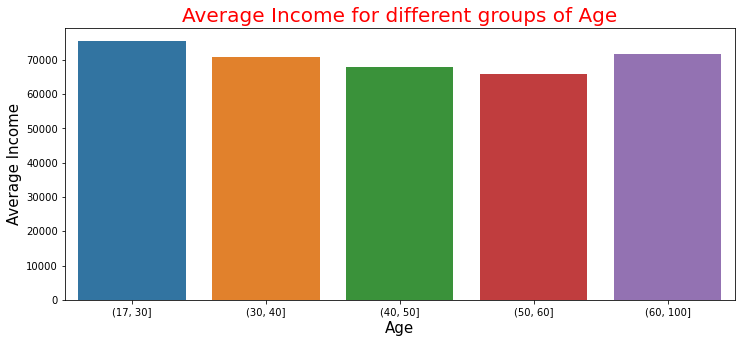

In [66]:
ageIncome = dfa.groupby(['Age'])['Income'].mean().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data = ageIncome[['Age', 'Income']], x = "Age", y = "Income")
plt.xlabel('Age', size = 15)
plt.ylabel('Average Income', size = 15)
plt.title('Average Incomе for different groups of Age', color = 'red', size = 20)
plt.show()

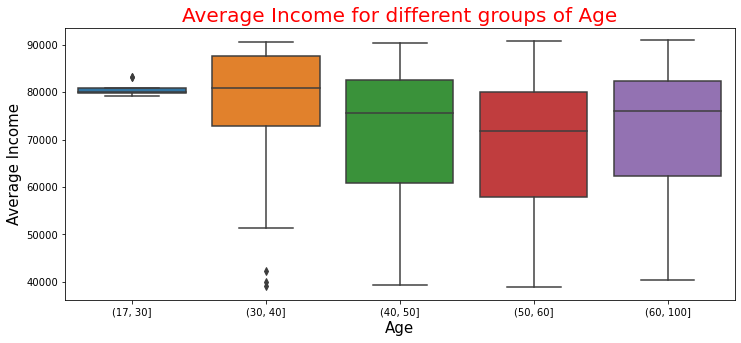

In [67]:
#using boxplot to visualize same data
plt.figure(figsize=(12,5))
sns.boxplot(x = "Age", y = "Income", data=dfa[(dfa.Income>dfa.Income.quantile(0.1))&(dfa.Income<dfa.Income.quantile(0.9))])
plt.xlabel('Age', size = 15)
plt.ylabel('Average Income', size = 15)
plt.title('Average Incomе for different groups of Age', color = 'red', size = 20)
plt.show()

<Figure size 1080x720 with 0 Axes>

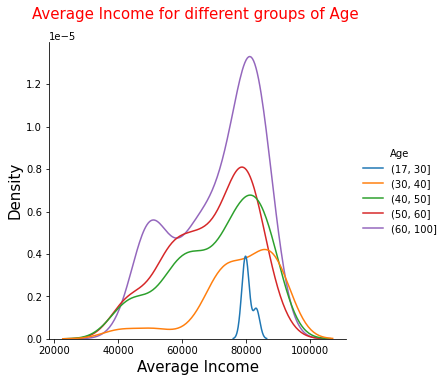

In [76]:
#distribution of income in different age groups
plt.figure(figsize=(15,10))
sns.displot(data=dfa[(dfa.Income>dfa.Income.quantile(0.1))&(dfa.Income<dfa.Income.quantile(0.9))].reset_index(),
            x = "Income", hue='Age', kind='kde')
plt.xlabel('Average Income', size = 15)
plt.ylabel('Density', size = 15)
plt.title('Average Incomе for different groups of Age \n', color = 'red', size = 15)
plt.show()

<Figure size 864x360 with 0 Axes>

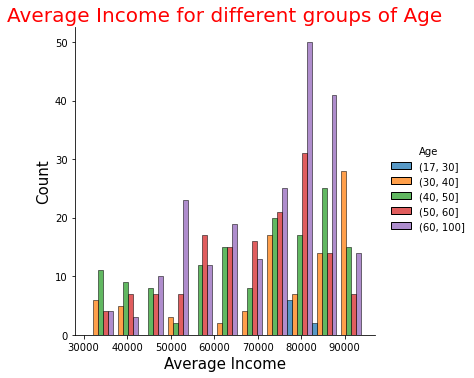

In [77]:
#bar plot for the same data
plt.figure(figsize=(12,5))
sns.displot(data=dfa[(dfa.Income>dfa.Income.quantile(0.05))&(dfa.Income<dfa.Income.quantile(0.95))].reset_index(), 
            x = "Income", hue='Age', multiple='dodge')
plt.xlabel('Average Income', size = 15)
plt.ylabel('Count', size = 15)
plt.title('Average Incomе for different groups of Age', color = 'red', size = 20)
plt.show()

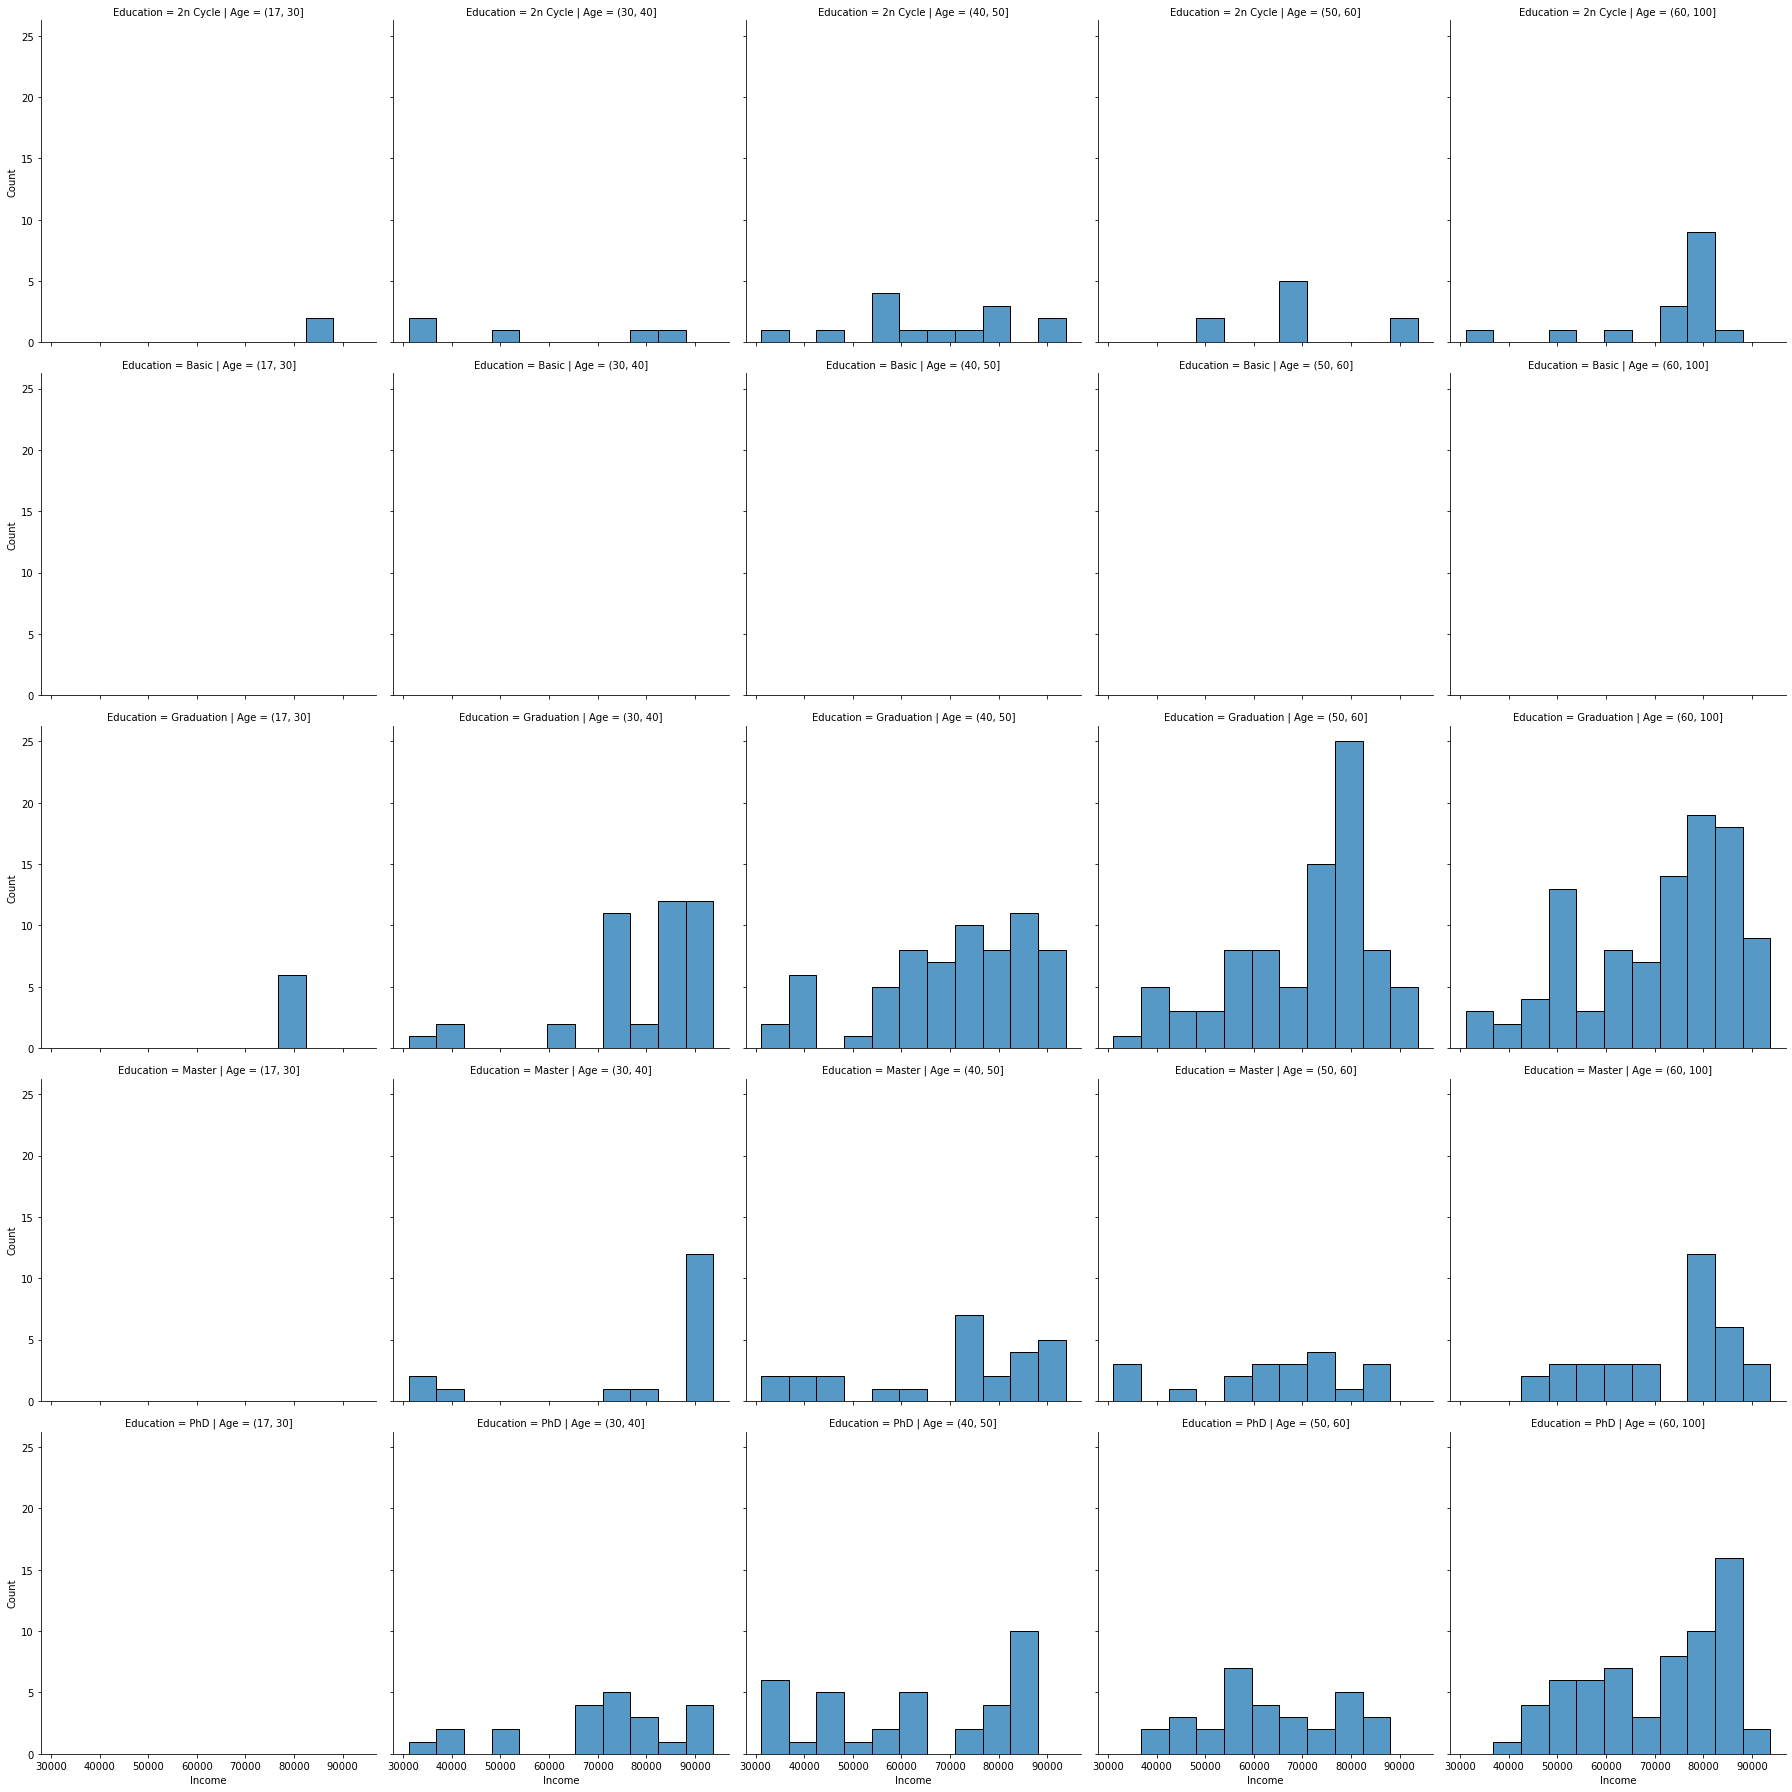

In [78]:
#pairwise comparisions of income distributions among different age groups and education
sns.displot(
    dfa[(dfa.Income>dfa.Income.quantile(0.05))&(dfa.Income<dfa.Income.quantile(0.95))].reset_index(), 
    x="Income", col="Age", row='Education'  
)

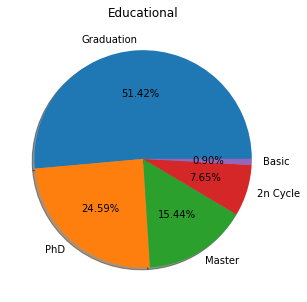

In [79]:
#pie diagram for the same
size = dfa['Education'].value_counts(normalize=True)
plt.figure(figsize=(12,5))
plt.pie(size, shadow = True, autopct = "%.2f%%", labels=size.index)
plt.title('Educational')
plt.show()

In [80]:
#filling all the empty columns with 0
df_pie = df_p.reset_index()
df_pie.Total = df_pie.Total.fillna(0)

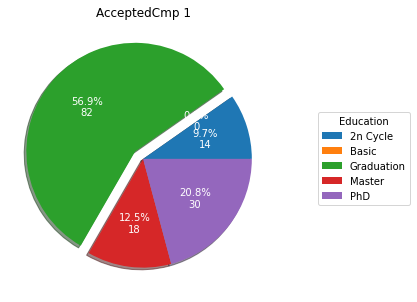

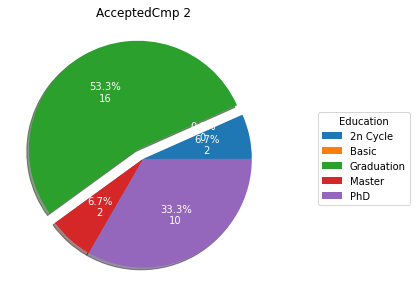

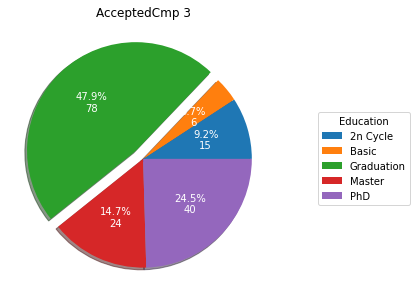

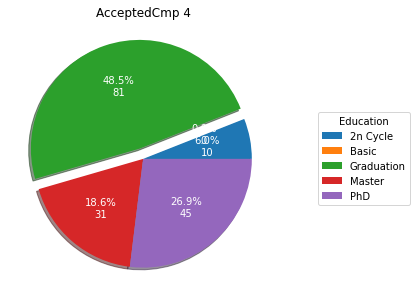

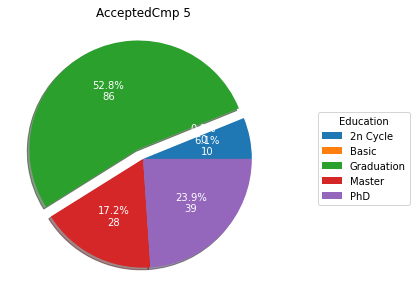

In [81]:
#building pie chart for the people who bought product as part of marketing campaign (based on their education)
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n{:d}".format(pct, absolute)


for e in range(1, 6):
    plt.figure(figsize=(12,5))
    dt = df_pie[df_pie['AcceptedCmp']==e]
    exp = np.zeros(len(dt))
    exp[np.argmax(dt.Total)] = 0.1

    plt.pie(dt.Total, shadow = True,   explode=exp, 
            autopct=lambda pct: func(pct, dt.Total),
            textprops=dict(color="w"))

    plt.title('AcceptedCmp ' + str(e))
    plt.legend(dt.Education, title="Education",
          loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()
